<a href="https://colab.research.google.com/github/cbarca871/Laguardia-Project/blob/main/Python_Project_3_19_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


📊 Orchard Collegiate Academy: Regents Exam Statistics (All Years):
       Total Tested  Percent Scoring 80 or Above  Percent Scoring 65 or Above  \
count    201.000000                   201.000000                   201.000000   
mean      23.442786                    11.763184                    46.958706   
std       14.980920                    14.723924                    24.812941   
min        6.000000                     0.000000                     0.000000   
25%       11.000000                     0.000000                    28.600000   
50%       20.000000                     6.300000                    44.400000   
75%       32.000000                    16.700000                    66.700000   
max       74.000000                    62.500000                   100.000000   

       Percent Scoring Below 65  Mean Score  
count                201.000000  201.000000  
mean                  53.044279   60.457711  
std                   24.812069    8.957279  
min               

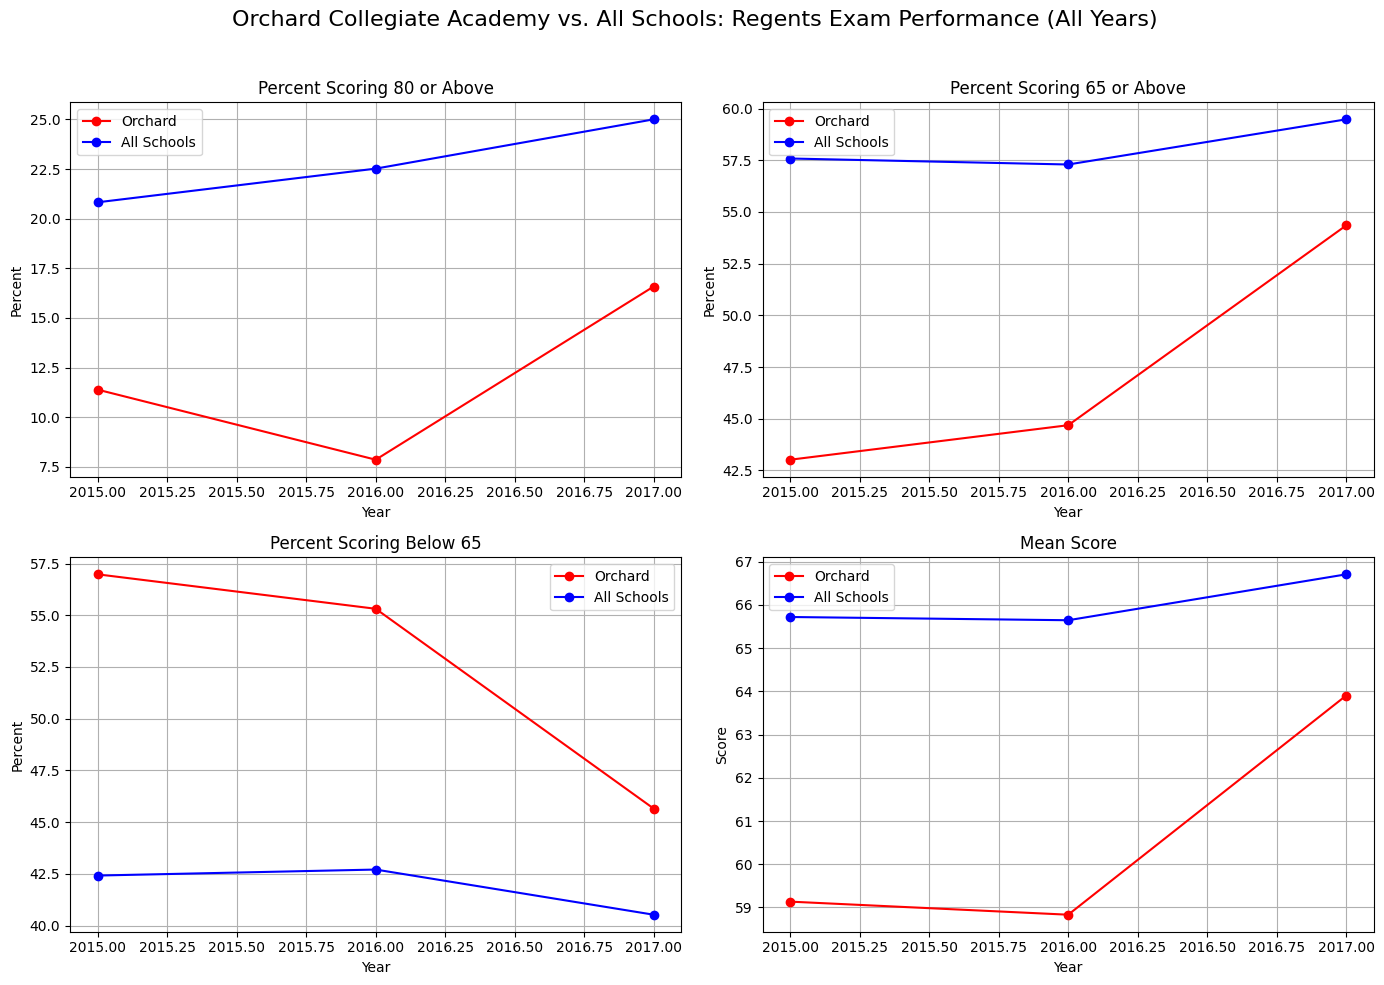

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv"
df = pd.read_csv(url)

# --- Cleaning Task ---
# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Replace 's' and 'na' with NaN
df.replace(['s', 'na'], pd.NA, inplace=True)

# Remove rows with missing values in relevant columns
relevant_cols = [
    'Total Tested',
    'Percent Scoring 80 or Above',
    'Percent Scoring 65 or Above',
    'Percent Scoring Below 65',
    'Mean Score'
]

# Convert relevant columns to numeric
for col in relevant_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Remove remaining NaNs in relevant columns
df_clean = df.dropna(subset=relevant_cols)

# --- Analysis: Orchard Collegiate Academy vs. All Schools ---
# Filter for Orchard Collegiate Academy
orchard = df_clean[df_clean['School Name'].str.contains('Orchard Collegiate Academy', case=False, na=False)]

# Descriptive statistics
orchard_stats = orchard[relevant_cols].describe()
all_schools_stats = df_clean[relevant_cols].describe()

# Display descriptive statistics
print("\n📊 Orchard Collegiate Academy: Regents Exam Statistics (All Years):")
print(orchard_stats)

print("\n📈 All Schools: Regents Exam Statistics (All Years):")
print(all_schools_stats)

# --- Visualization ---
# Line plots comparing Orchard vs. all schools over time
if 'Year' in df_clean.columns:
    # Group Orchard data by year, selecting only numeric columns for the mean calculation
    orchard_grouped = orchard.groupby('Year')[relevant_cols].mean().reset_index()

    # Group all schools data by year, selecting only numeric columns for the mean calculation
    all_schools_grouped = df_clean.groupby('Year')[relevant_cols].mean().reset_index()

    # Plotting
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('Orchard Collegiate Academy vs. All Schools: Regents Exam Performance (All Years)', fontsize=16)

    # Percent Scoring 80 or Above
    axes[0, 0].plot(orchard_grouped['Year'], orchard_grouped['Percent Scoring 80 or Above'], marker='o', label='Orchard', color='red')
    axes[0, 0].plot(all_schools_grouped['Year'], all_schools_grouped['Percent Scoring 80 or Above'], marker='o', label='All Schools', color='blue')
    axes[0, 0].set_title('Percent Scoring 80 or Above')
    axes[0, 0].set_xlabel('Year')
    axes[0, 0].set_ylabel('Percent')
    axes[0, 0].legend()
    axes[0, 0].grid(True)

    # Percent Scoring 65 or Above
    axes[0, 1].plot(orchard_grouped['Year'], orchard_grouped['Percent Scoring 65 or Above'], marker='o', label='Orchard', color='red')
    axes[0, 1].plot(all_schools_grouped['Year'], all_schools_grouped['Percent Scoring 65 or Above'], marker='o', label='All Schools', color='blue')
    axes[0, 1].set_title('Percent Scoring 65 or Above')
    axes[0, 1].set_xlabel('Year')
    axes[0, 1].set_ylabel('Percent')
    axes[0, 1].legend()
    axes[0, 1].grid(True)

    # Percent Scoring Below 65
    axes[1, 0].plot(orchard_grouped['Year'], orchard_grouped['Percent Scoring Below 65'], marker='o', label='Orchard', color='red')
    axes[1, 0].plot(all_schools_grouped['Year'], all_schools_grouped['Percent Scoring Below 65'], marker='o', label='All Schools', color='blue')
    axes[1, 0].set_title('Percent Scoring Below 65')
    axes[1, 0].set_xlabel('Year')
    axes[1, 0].set_ylabel('Percent')
    axes[1, 0].legend()
    axes[1, 0].grid(True)

    # Mean Score
    axes[1, 1].plot(orchard_grouped['Year'], orchard_grouped['Mean Score'], marker='o', label='Orchard', color='red')
    axes[1, 1].plot(all_schools_grouped['Year'], all_schools_grouped['Mean Score'], marker='o', label='All Schools', color='blue')
    axes[1, 1].set_title('Mean Score')
    axes[1, 1].set_xlabel('Year')
    axes[1, 1].set_ylabel('Score')
    axes[1, 1].legend()
    axes[1, 1].grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
else:
    print("No 'Year' column found in the dataset.")